# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1
The dtypes function returns the data types of each column 

We are using the isnull() for the Null values and counting them for each column

In [10]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


data_types = df.dtypes
print("Data types:")
print(data_types)
print('\n')
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Number of rows: 148654
Number of columns: 13
Data types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


Missing values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# task 2 

In [12]:
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0] 

min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

salary_range = max_salary - min_salary

std_dev_salary = df['TotalPay'].std()

print("Mean Salary: ", mean_salary)
print("Median Salary: ", median_salary)
print("Mode Salary: ", mode_salary)
print("Minimum Salary: ", min_salary)
print("Maximum Salary: ", max_salary)
print("Salary Range: ", salary_range)
print("Standard Deviation of Salary: ", std_dev_salary)

Mean Salary:  74768.32197169267
Median Salary:  71426.60999999999
Mode Salary:  0.0
Minimum Salary:  -618.13
Maximum Salary:  567595.43
Salary Range:  568213.56
Standard Deviation of Salary:  50517.00527394987


# task 3 
# first we need to see what columns that have missing values

In [42]:
import pandas as pd

null_columns = df.columns[df.isnull().any()]

print("Columns with NaN or null values:")
print(null_columns)

Columns with NaN or null values:
Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Notes', 'Status'], dtype='object')


# Handling missing data
There are many methods to handle missing data such as just dropping the records that contain none or NaN values using the dropna() function, but this way we are going to lose huge amount of data. So we are going to fill the missing data with appropriate values for each column. 
In the Benefits column we could fill the NaN values with the mean or mode, but this way we are going to change in the objective of the data so we can't add benefits for the employees and instead, we are going to replace them with 0. 

We are going to do the same for the "OtherPay" and "OvertimePay".

for the "BasePay" we are going to replace the missing values with the mean value.

For Notes column we are replacing the missing values with "No notes so far"

For Status column we are replacing the missing values with "Not Available"



In [43]:

df['Benefits'] = df['Benefits'].fillna(0)
df['OvertimePay'] = df['OvertimePay'].fillna(0)
df['OtherPay'] = df['OtherPay'].fillna(0)
mean_BasePay  = df['BasePay'].mean()
df['BasePay'] = df['BasePay'].fillna(mean_BasePay)
df['Notes'] = df['Notes'].fillna('No notes so far')
df['Status'] = df['Status'].fillna('Not Available')

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,No notes so far,San Francisco,Not Available
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,No notes so far,San Francisco,Not Available
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,No notes so far,San Francisco,Not Available
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,No notes so far,San Francisco,Not Available
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,No notes so far,San Francisco,Not Available


# task 4 
# Histogram

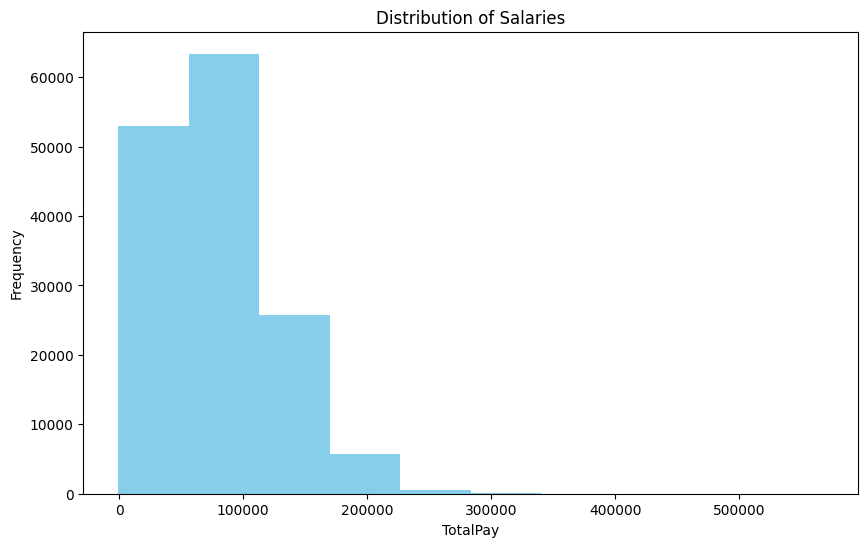

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=10, color='skyblue')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()



# bar chart

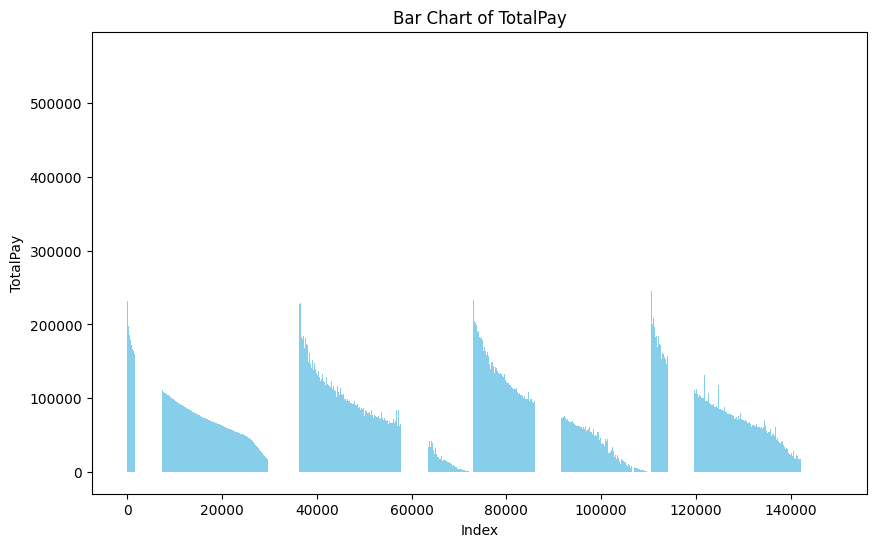

In [45]:

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['TotalPay'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('TotalPay')
plt.title('Bar Chart of TotalPay')
plt.show()

# pie charts

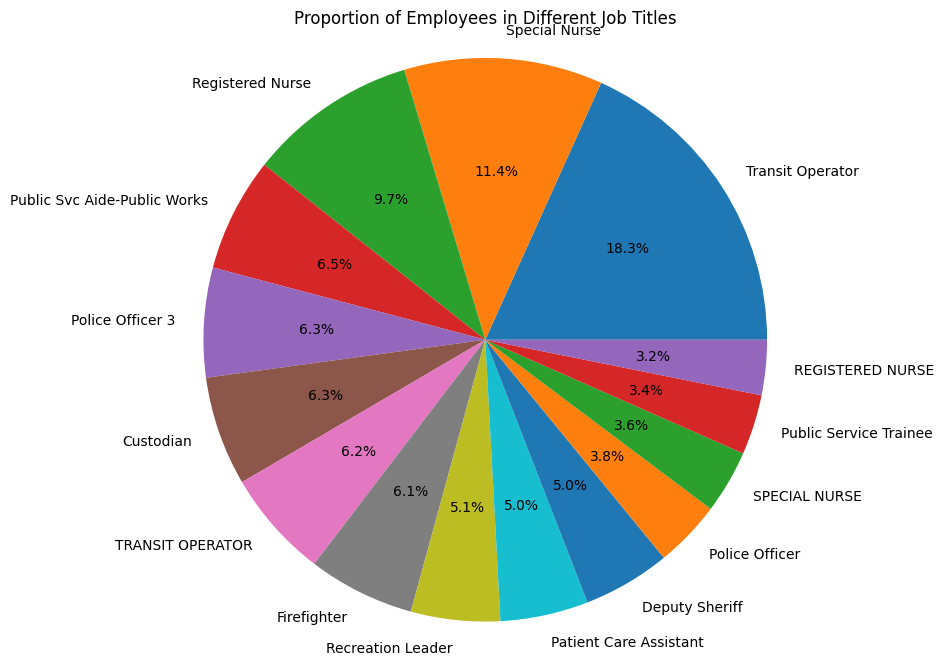

In [48]:
job_counts = df['JobTitle'].value_counts()
top_10_jobs = job_counts[:15]

plt.figure(figsize=(8, 8))
plt.pie(top_10_jobs, labels=top_10_jobs.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Job Titles')
plt.axis('equal')
plt.show()

# task5
I grouped the year and JobTitle and get the mean of TotalPay for each group.

In [49]:

grouped_df = df.groupby(['Year', 'JobTitle'])

average_total_pay = grouped_df['TotalPay'].mean()

# I sorted them to see the comparison betweeen groups 
average_total_pay_df = average_total_pay.reset_index().sort_values(by='TotalPay', ascending=False)

print(average_total_pay_df)



      Year                                        JobTitle    TotalPay
395   2011  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  399211.275
3318  2014                        Chief Investment Officer  339653.700
2278  2013                                 Chief of Police  339282.070
2279  2013                          Chief, Fire Department  336922.010
3326  2014                                 Chief of Police  326716.760
...    ...                                             ...         ...
2839  2013                         Public Safety Comm Tech       0.000
2553  2013                             IS Operator-Journey       0.000
2416  2013                          Drug Court Coordinator       0.000
3977  2014                            Special Assistant 15       0.000
3723  2014                                    Not provided       0.000

[4137 rows x 3 columns]


# task 6


Correlation coefficient: 0.6322018839186374


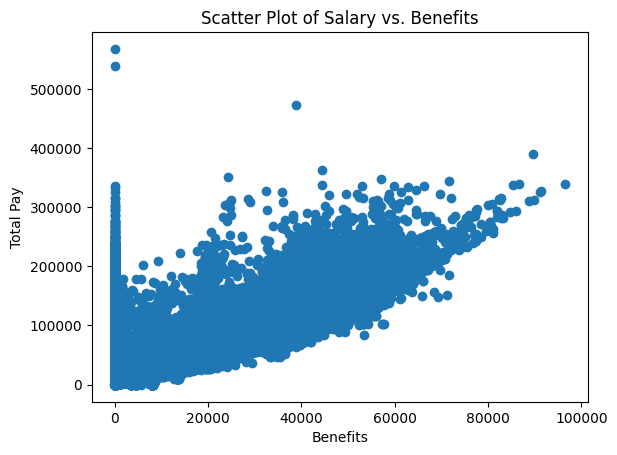

In [52]:
correlation = df['TotalPay'].corr(df['Benefits'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Create a scatter plot to visualize the relationship
plt.scatter(df['Benefits'], df['TotalPay'])
plt.xlabel('Benefits')
plt.ylabel('Total Pay')
plt.title('Scatter Plot of Salary vs. Benefits')
plt.show()

# task 7
The dataset included information about employees and their info such as their names, salaries, job titles and. 
As part of data exploratory, we applied some functions to get better insight about the data the relations between records and columns. We were first introduced to the data types of the columns in task one. 
Next, we applied functions on the "salaries" column to get the mean, range and other values that help us to better identify the distribution of the values. 

Task three was very important and sensitive step to handle missing data, any mistaking approach would lead to a corruption in the dataset and affect the performance of the model and operations in later steps. For example, dropping the rows that include NaN values is wrong way to handle missing data because this way we are going to lose many data that we need. I considered every column and I replaced the missing data by the proper values that are informative and also do not change the objective of the data and their sensitive values.

In task four we plotted charts to visualize some data and be able to comprehend the distribution the data more such as the pie chart that represents the number of employees in each section.

In task five, we grouped some columns to get some analytics of the combinations between the values. 

Finally, in task six we were introduced to the correlations between two columns and we also plotted a scatter chart to represent the relationship between two coloumns. 


Best Regards,

# Good Luck!